Acurácia (modelo inicial): 0.9017145826117077
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       0.93      0.89      0.91       579
           B       0.94      0.97      0.95       562
           C       0.99      0.90      0.94       583
           D       0.86      0.96      0.91       550
           E       0.84      0.84      0.84       574
           F       0.89      0.94      0.91       450
           G       0.83      0.69      0.75       550
           I       0.77      0.92      0.84       550
           L       0.87      0.87      0.87       550
           M       0.87      0.93      0.90       550
           N       0.94      0.84      0.88       550
           O       0.83      0.90      0.86       550
           P       0.98      0.99      0.98       550
           Q       0.95      1.00      0.97       550
           R       0.89      0.81      0.85       550
           S       0.94      0.93      0.94

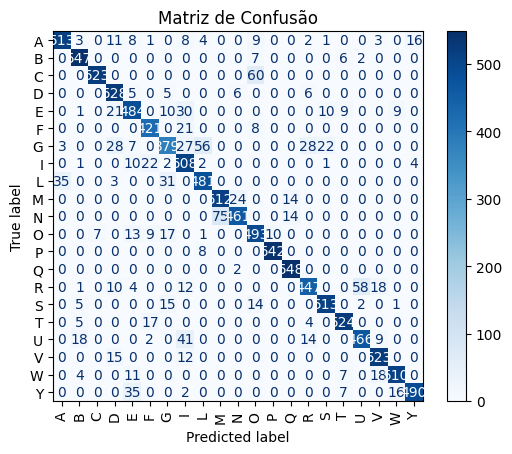

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=adam; total time=  51.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=adam; total time= 1.1min
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time= 3.1min
[CV] END activation=relu, hidden_layer_sizes=(50,), solver=sgd; total time= 4.7min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time= 1.5min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=adam; total time= 1.8min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time= 4.8min
[CV] END activation=relu, hidden_layer_sizes=(100,), solver=sgd; total time= 6.7min
[CV] END activation=tanh, hidden_layer_sizes=(50,), solver=adam; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(50,), solver=adam; total time= 1.6min
[CV] END activation=tanh, hidden_layer_sizes=(50,), solver=sgd; total time= 4.4min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), solver=sgd; total time= 4.7min
[CV] END activation=tanh, hidden_layer_sizes=(100,), solver=adam; total time= 1.6min
[CV] END activation=tanh, hidden_layer_sizes=(100,), solver=adam; total time= 2.2min
[CV] END activation=tanh, hidden_layer_sizes=(100,), solver=sgd; total time= 6.5min


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), solver=sgd; total time= 9.0min
Melhores parâmetros encontrados: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
Melhor score encontrado: 0.4713084058305006
Acurácia (modelo otimizado): 0.8691548320055421
Relatório de Classificação (modelo otimizado):
               precision    recall  f1-score   support

           A       0.80      0.80      0.80       579
           B       0.84      0.95      0.89       562
           C       0.99      0.92      0.95       583
           D       0.74      0.97      0.84       550
           E       0.89      0.71      0.79       574
           F       0.80      0.81      0.80       450
           G       0.80      0.71      0.75       550
           I       0.90      0.85      0.87       550
           L       0.88      0.91      0.90       550
           M       0.88      0.93      0.90       550
           N       0.85      0.84      0.85       550
           O       0.82 

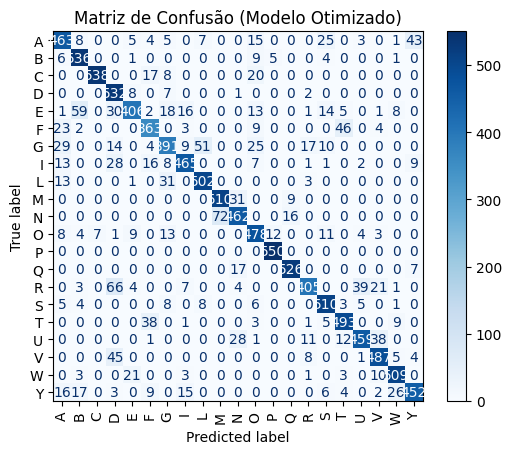

In [ ]:
# Importação das bibliotecas necessárias
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

In [ ]:
# Carregar os dados preparados
x_treino = np.load('x_treino.npy')  # Carrega as imagens de treinamento
y_treino = np.load('y_treino.npy')  # Carrega os rótulos de treinamento

x_validacao = np.load('x_validacao.npy')  # Carrega as imagens de validação
y_validacao = np.load('y_validacao.npy')  # Carrega os rótulos de validação

x_teste = np.load('x_teste.npy')  # Carrega as imagens de teste
y_teste = np.load('y_teste.npy')  # Carrega os rótulos de teste

In [ ]:
# Escalonamento dos dados
scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_validacao = scaler.transform(x_validacao)
x_teste = scaler.transform(x_teste)

In [ ]:
# Otimização dos hiperparâmetros com GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}
grid_search = GridSearchCV(MLPClassifier(max_iter=200), param_grid, scoring='accuracy', cv=2, verbose=2)
grid_search.fit(x_treino, y_treino)

# Resultados do modelo otimizado
best_mlp = grid_search.best_estimator_

# Exibir melhores parâmetros e melhor score
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score encontrado:", grid_search.best_score_)

#Melhores parâmetros encontrados: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
#Melhor score encontrado: 0.4713084058305006

In [ ]:
# Criação e treinamento do modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42, solver='sgd', activation='tanh')
mlp.fit(x_treino, y_treino)
#Melhores parâmetros encontrados: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}

MLPClassifier(activation='tanh', max_iter=300, random_state=42, solver='sgd')

In [ ]:
# Avaliação do modelo inicial
y_pred = mlp.predict(x_validacao)
print("Acurácia (modelo inicial):", accuracy_score(y_validacao, y_pred))
print("Relatório de Classificação (modelo inicial):\n", classification_report(y_validacao, y_pred))

Acurácia (modelo inicial): 1.0
Relatório de Classificação (modelo inicial):
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       328
           B       1.00      1.00      1.00       342
           C       1.00      1.00      1.00       349
           D       1.00      1.00      1.00       327
           E       1.00      1.00      1.00       340
           F       1.00      1.00      1.00       340
           G       1.00      1.00      1.00       338
           I       1.00      1.00      1.00       320
           L       1.00      1.00      1.00       354
           M       1.00      1.00      1.00       312
           N       1.00      1.00      1.00       319
           O       1.00      1.00      1.00       340
           P       1.00      1.00      1.00       324
           Q       1.00      1.00      1.00       317
           R       1.00      1.00      1.00       310
           S       1.00      1.00      1.00       328
    

In [ ]:
# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_validacao, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=mlp.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Matriz de Confusão")
plt.show()

In [ ]:
# Re-treinar e avaliar o modelo otimizado
y_pred_test = mlp.predict(x_teste)

# Acurácia e relatório
print("Acurácia (modelo otimizado):", accuracy_score(y_teste, y_pred_test))
print("Relatório de Classificação (modelo otimizado):\n", classification_report(y_teste, y_pred_test))


Acurácia (modelo otimizado): 0.8574644960166262
Relatório de Classificação (modelo otimizado):
               precision    recall  f1-score   support

           A       0.91      0.75      0.83       579
           B       0.83      0.91      0.87       562
           C       0.98      0.87      0.93       583
           D       0.75      0.95      0.84       550
           E       0.83      0.69      0.75       574
           F       0.82      0.86      0.84       450
           G       0.76      0.67      0.71       550
           I       0.73      0.92      0.82       550
           L       0.87      0.93      0.90       550
           M       0.86      0.88      0.87       550
           N       0.86      0.84      0.85       550
           O       0.85      0.86      0.85       550
           P       0.95      0.99      0.97       550
           Q       0.89      0.88      0.88       550
           R       0.88      0.75      0.81       550
           S       0.93      0.89      

In [ ]:
# Matriz de confusão do modelo otimizado
conf_matrix_best = confusion_matrix(y_teste, y_pred_test, labels=best_mlp.classes_)
disp_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=best_mlp.classes_)
disp_best.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Matriz de Confusão (Modelo Otimizado)")
plt.show()